In [1]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import emg_utils as eu

import importlib
importlib.reload(eu)

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [2]:
# directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading' # uni
# directory = '/home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading' # home
# directory = '/home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/' # home
directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/' # uni

anonymize = {1: '06_14_nat_unloading', 2: '06_15_chris_unloading', 3: '06_15_joh_unloading'}
target = 1

directory = directory + anonymize[target]

In [3]:
# b = []
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if not os.path.isdir(f):
#         b.append(bagreader(f))

calibration = []
trial = []
baseline = []
mvc = []

for filename in os.listdir(directory):
    file = os.path.splitext(filename)[0]
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        if file == 'calibration':
            calibration.append(bagreader(f))
        elif file.find('trial') != -1:
            trial.append(bagreader(f))
        elif file.find('baseline') != -1:
            baseline.append(bagreader(f))
        elif file.find('mvc') != -1:
            mvc.append(bagreader(f))

[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2 already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1 already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/mvc already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3 already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/calibration already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3 already exists. Not creating.
[I

In [84]:
trial[0].topic_table

,Topics,Types,Message Count,Frequency
0,Ws,std_msgs/Float64,30819,200.038345
1,compensation,std_msgs/Float64,30819,200.043115
2,down_Ws,std_msgs/Float64,30819,200.052657
3,down_sensor,std_msgs/Float64,9656,66.342476
4,emg_raw,std_msgs/Float64MultiArray,5272,19.366788
5,emg_rms,std_msgs/Float64,5298,19.406215
6,held_object,darknet_ros_msgs/BoundingBox,38,0.359176
7,load_trial,sync_msgs/MassTrial,10,0.066667
8,load_type,sync_msgs/TrialType,30,0.333333
9,mass_change,sync_msgs/MassTrial,38,0.359075


In [85]:
emg_frequency = trial[0].topic_table.Frequency[4]

### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [4]:
trial_emg_list = []
trial_rms_list = []
trial_type_list = []
trial_state_list = []
trial_mass_list = []
baseline_emg_list = []
baseline_rms_list = []
baseline_type_list = []


for bag in trial:
    if len(os.listdir(bag.datafolder)) == 0:
        trial_emg_list.append(bag.message_by_topic('emg_raw'))
        trial_rms_list.append(bag.message_by_topic('emg_rms'))
        trial_type_list.append(bag.message_by_topic('load_type'))
        trial_state_list.append(bag.message_by_topic('state'))
        trial_mass_list.append(bag.message_by_topic('mass_change'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in os.listdir(bag.datafolder):
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                trial_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                trial_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                trial_type_list.append(target_path)
            elif 'state'.find(file) != -1:
                trial_state_list.append(target_path)
            elif 'mass_change'.find(file) != -1:
                trial_mass_list.append(target_path)

for bag in baseline:
    folder = os.listdir(bag.datafolder)
    if len(folder) == 0:
        baseline_emg_list.append(bag.message_by_topic('emg_raw'))
        baseline_rms_list.append(bag.message_by_topic('emg_rms'))
        baseline_type_list.append(bag.message_by_topic('load_type'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in folder:
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                baseline_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                baseline_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                baseline_type_list.append(target_path)


CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial1
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline2


### Create pandas data frames from csv files

Function to convert csv to data frame:

In [5]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [6]:
trial_emg_dflist = csv2df(trial_emg_list)
trial_rms_dflist = csv2df(trial_rms_list)
trial_type_dflist = csv2df(trial_type_list)
trial_state_dflist = csv2df(trial_state_list)
trial_mass_dflist = csv2df(trial_mass_list)

baseline_emg_dflist = csv2df(baseline_emg_list)
baseline_rms_dflist = csv2df(baseline_rms_list)
baseline_type_dflist = csv2df(baseline_type_list)

## Plot EMG data

In [7]:
plt.style.use('seaborn')

In [8]:
# MVC
mvc_csv = mvc[0].message_by_topic('/rms_samples')
mvc_max = pd.read_csv(mvc_csv)['data'].max()
print("MVC: " + str(mvc_max))

MVC: 0.0837975294663056


In [9]:
window_length = 40 # 25
ymin = 0.005
ymax = 0.2

### Per Trial Plot

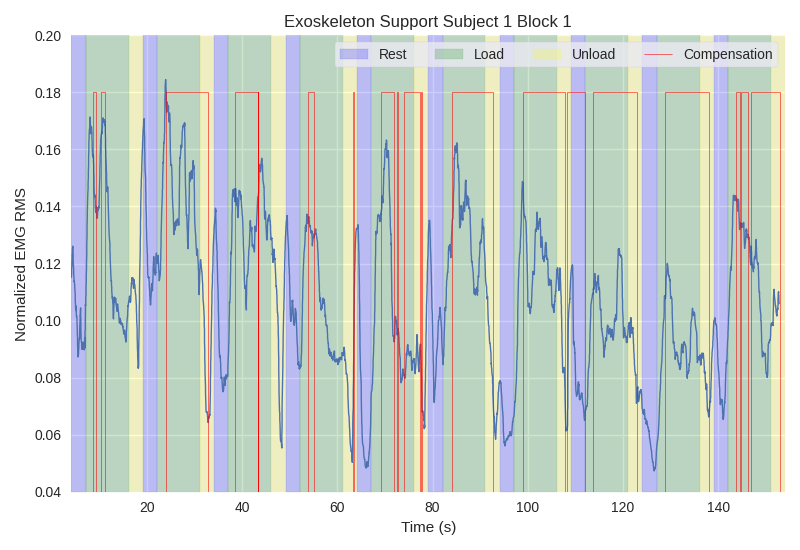

In [13]:
# plt.close('all')
i = 0
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Exoskeleton Support Subject ' + str(target) + ' Block ' + str(i+1))
plt.tight_layout()

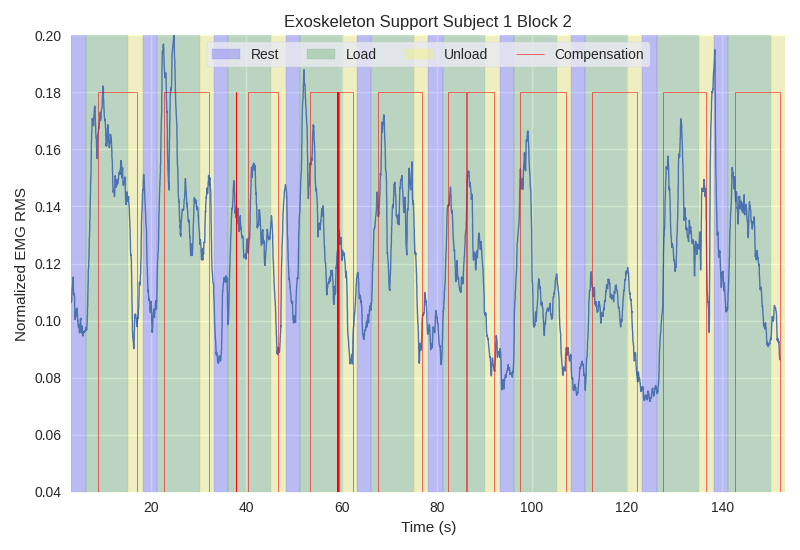

In [17]:
i = 1
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Exoskeleton Support Subject ' + str(target) + ' Block ' + str(i+1))
plt.tight_layout()

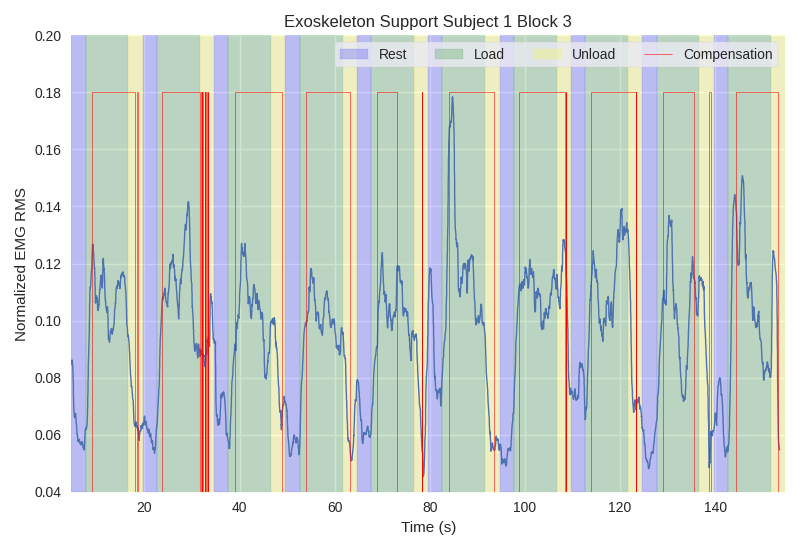

In [16]:
i = 2
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Exoskeleton Support Subject ' + str(target) + ' Block ' + str(i+1))
plt.tight_layout()

### Per Baseline Plot

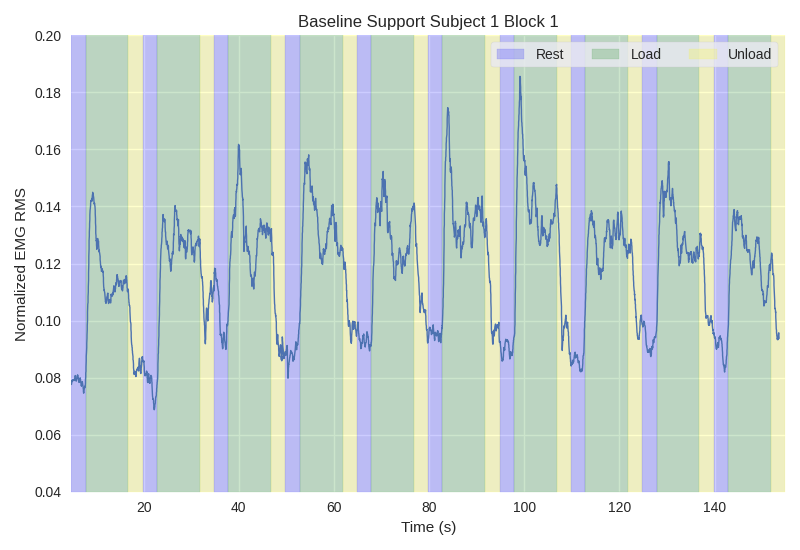

In [18]:
# plt.close('all')
i = 0
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Baseline Support Subject ' + str(target) + ' Block ' + str(i+1))
plt.tight_layout()

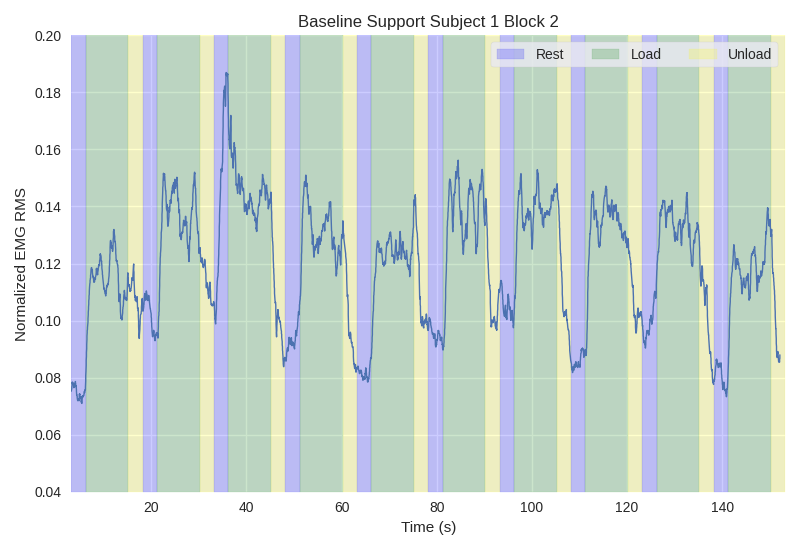

In [19]:
i = 1
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Baseline Support Subject ' + str(target) + ' Block ' + str(i+1))
plt.tight_layout()

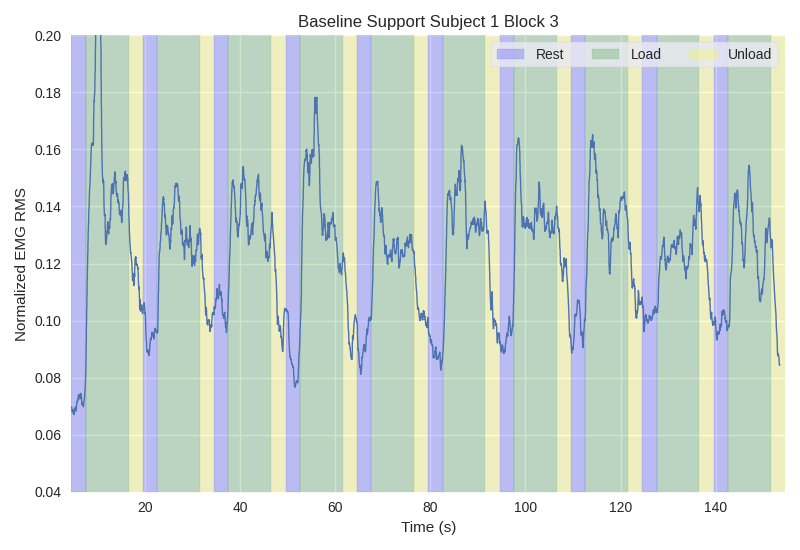

In [20]:
i = 2
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Baseline Support Subject ' + str(target) + ' Block ' + str(i+1))
plt.tight_layout()

### Exoskeleton, Baseline EMG side by side

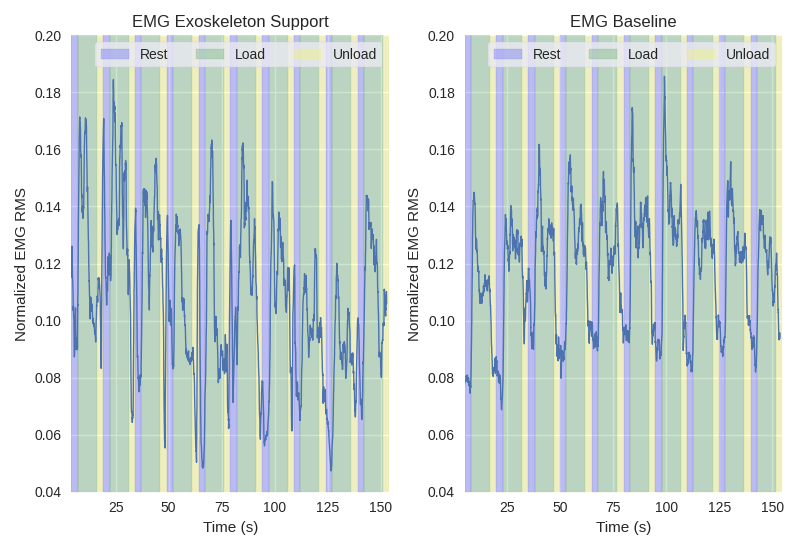

In [16]:
# plt.close('all')
i = 0
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

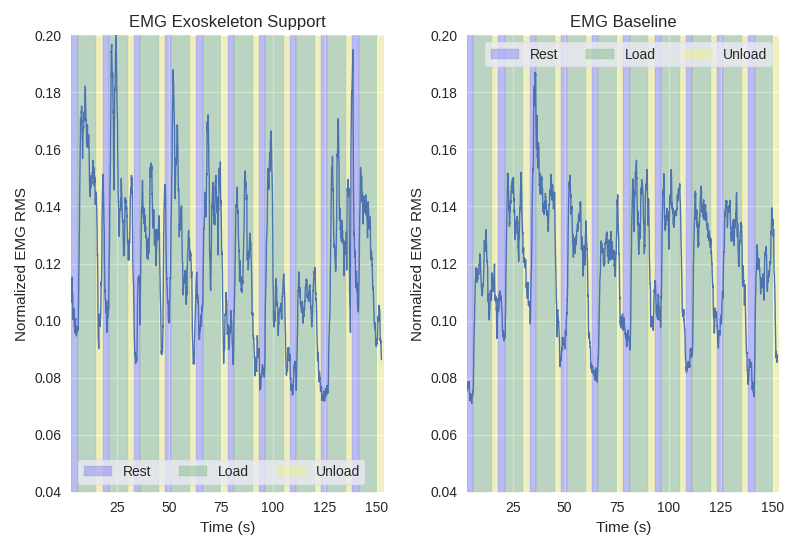

In [17]:
i = 1
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

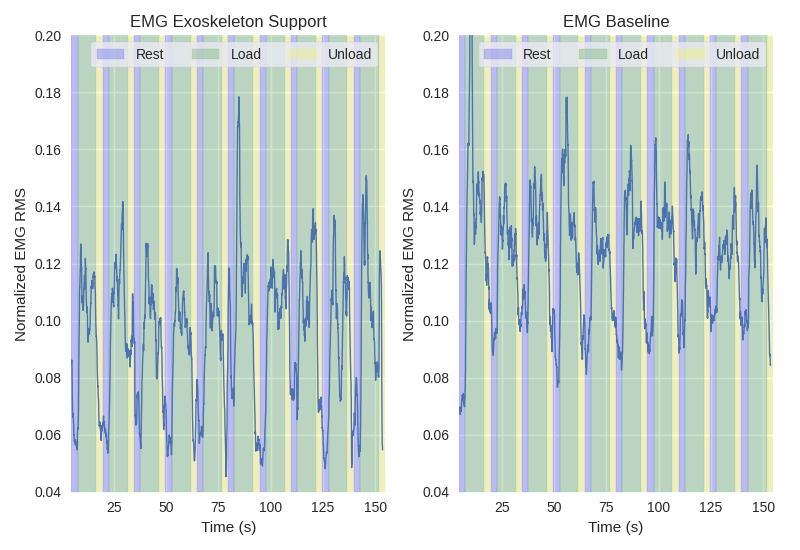

In [18]:
i = 2
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

## Overview Plot

In [12]:
limits = [[0.005, 0.03],
          [30, 120],
          [-0.5, 0.5]]

### 1 Trial

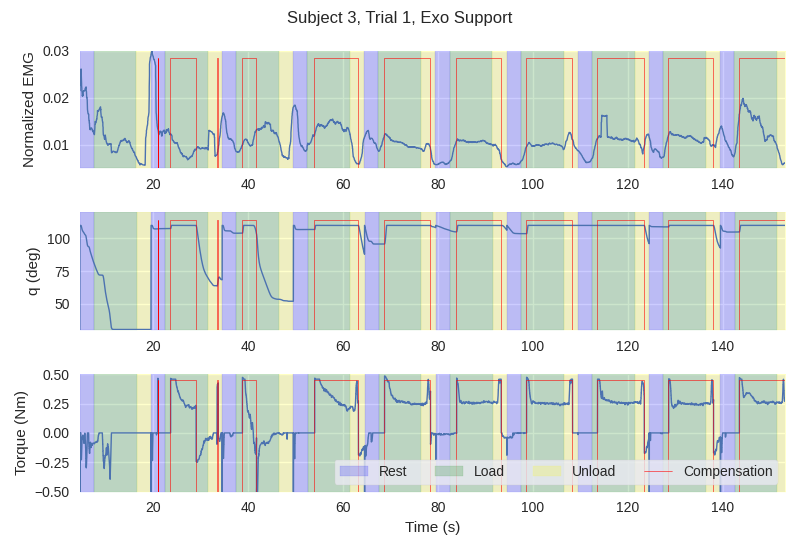

In [33]:
i = 0
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], 
                                window=window_length, mvc=mvc_max, limits=limits)
figure.suptitle('Subject ' + str(target) + ', Block ' + str(i+1) + ', Exo Support')
plt.tight_layout()

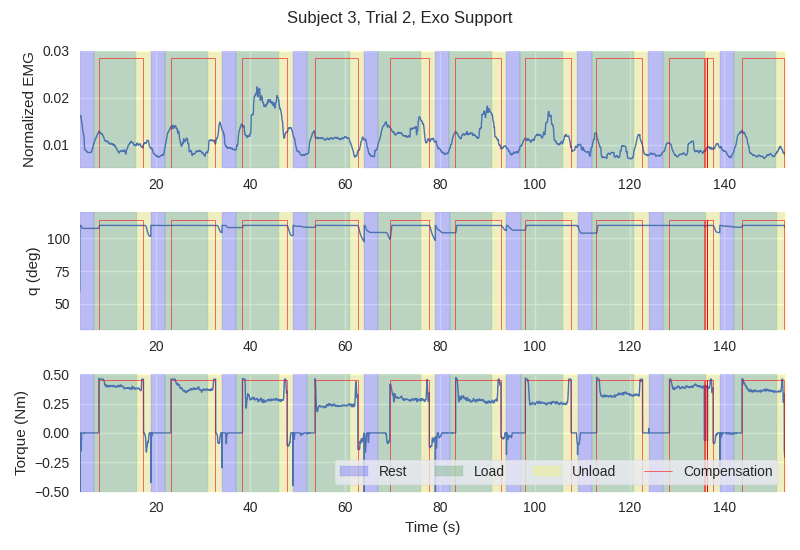

In [34]:
i = 1
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], 
                                window=window_length, mvc=mvc_max, limits=limits)
figure.suptitle('Subject ' + str(target) + ', Block ' + str(i+1) + ', Exo Support')
plt.tight_layout()

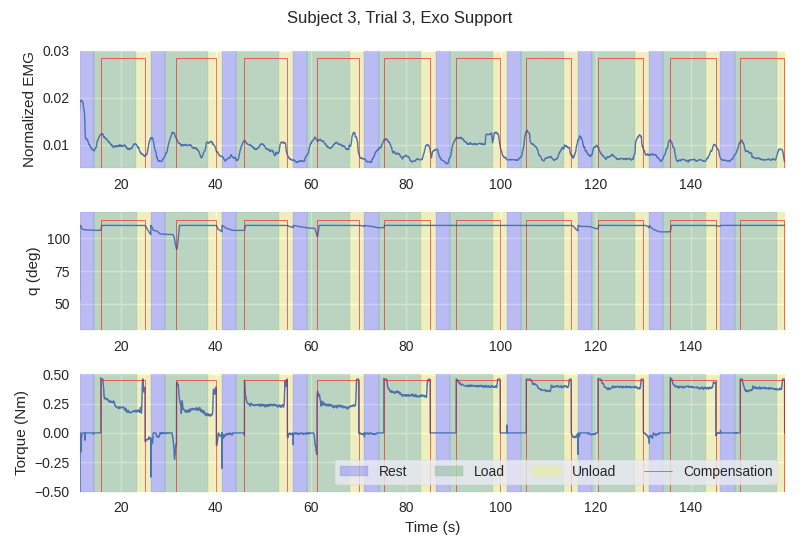

In [35]:
i = 2
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], 
                                window=window_length, mvc=mvc_max, limits=limits)
figure.suptitle('Subject ' + str(target) + ', Block ' + str(i+1) + ', Exo Support')
plt.tight_layout()

## Average Plots

### Average Plot over all blocks

Text(0.5, 1.0, 'Subject 3:Exoskeleton EMG average over all blocks')

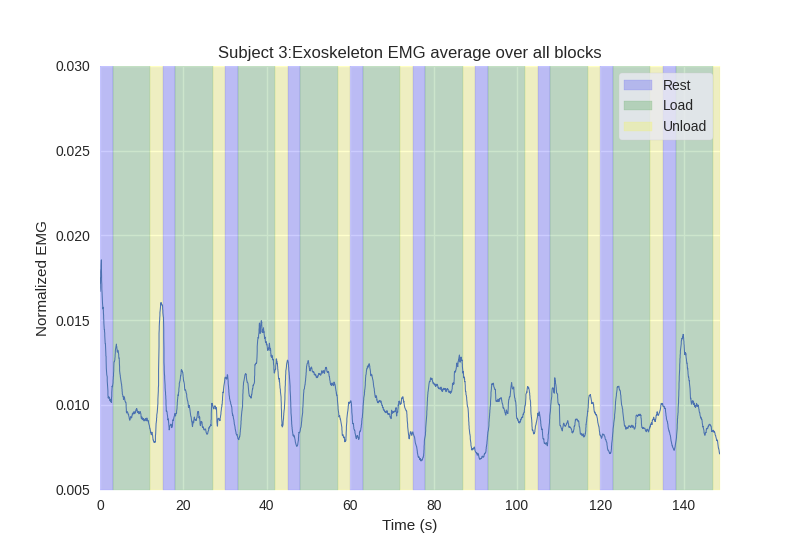

In [107]:
plt.close('all')
figure, axis = plt.subplots()
eu.plot_average(axis, trial_emg_dflist, trial_type_dflist, window_length, ymin, ymax, mvc_max)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject '+str(target)+':Exoskeleton EMG average over all blocks')

Text(0.5, 1.0, 'Subject 3:Baseline EMG average over all blocks')

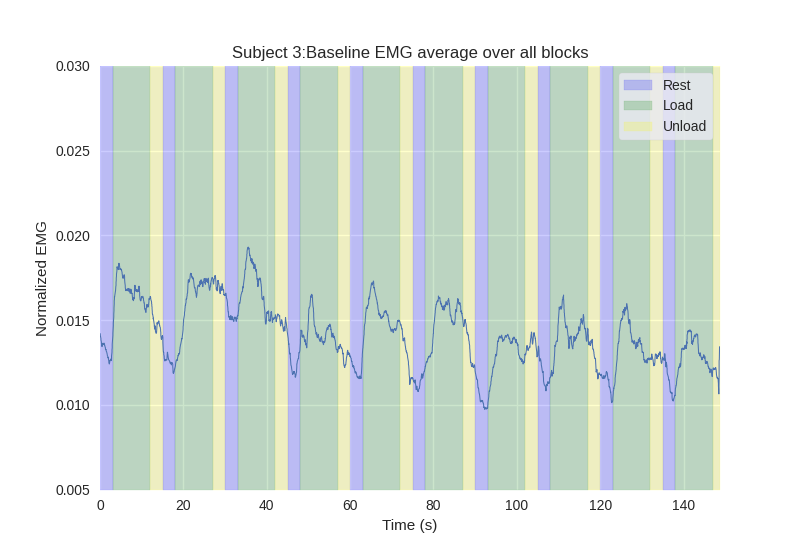

In [108]:
plt.close('all')
figure, axis = plt.subplots()
eu.plot_average(axis, baseline_emg_dflist, baseline_type_dflist, window_length, ymin, ymax, mvc_max)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject '+str(target)+':Baseline EMG average over all blocks')

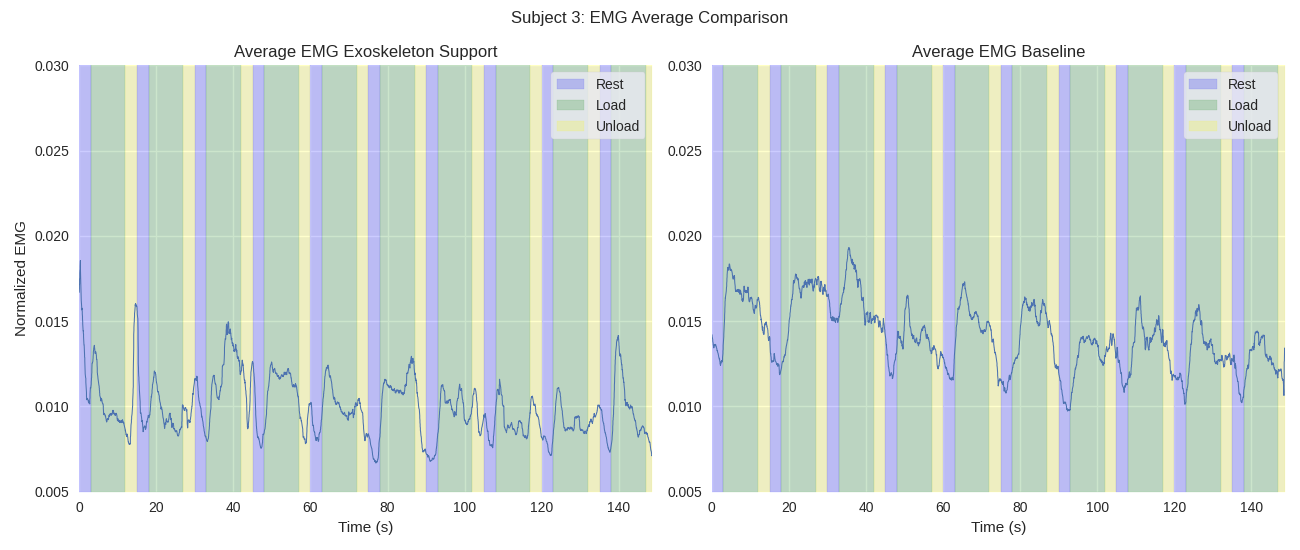

In [109]:
plt.close('all')
figure, axis = eu.average_EMG_comp(trial_type_dflist, trial_emg_dflist, baseline_type_dflist, baseline_emg_dflist, window_length, 'horizontal', ymin, ymax, mvc_max)
axis[0].set_ylabel('Normalized EMG')
axis[0].set_xlabel('Time (s)')
axis[1].set_xlabel('Time (s)')
figure.suptitle('Subject ' + str(target) + ': EMG Average Comparison')
figure.set_figwidth(13)
plt.tight_layout()
# figure.set_figheight()

### Average trial plot per block

(0.005, 0.2)

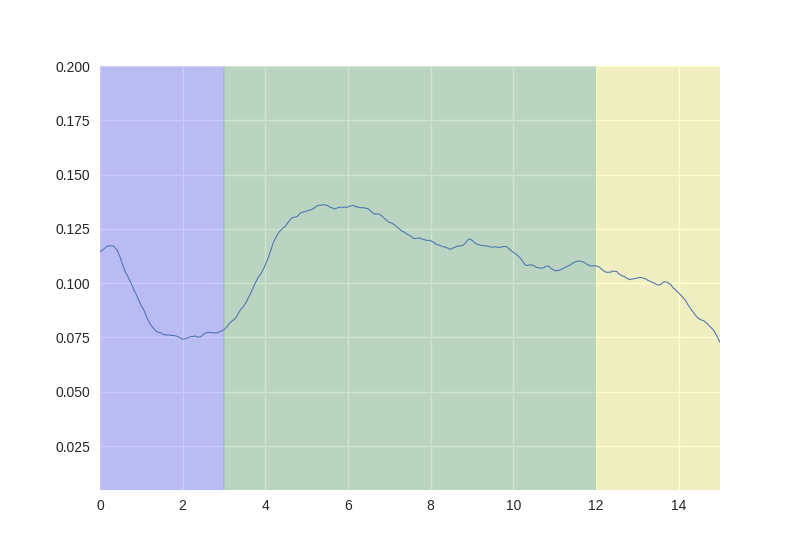

In [120]:
i = 0

rest_stack, load_stack, unload_stack = eu.calculate_average_trial(trial_type_dflist[i], trial_emg_dflist[i], mvc_max)

rest_avg = np.mean(rest_stack, axis=0)
rest_var = np.var(rest_stack, axis=0)

load_avg = np.mean(load_stack, axis=0)
load_var = np.var(load_stack, axis=0)

unload_avg = np.mean(unload_stack, axis=0)
unload_var = np.var(unload_stack, axis=0)

loading_time = 9 # 6 
unloading_time = 3
resting_time = 3 # 5

plt.close('all')
figure, axis = plt.subplots()
emg_sequence = eu.compute_RMS(np.concatenate((rest_avg, load_avg, unload_avg)), window_length)
time = np.linspace(0, loading_time + unloading_time + resting_time, emg_sequence.size)
axis.plot(time, emg_sequence, linewidth=0.75)

axis.fill_between([0, resting_time], 0, 1, alpha=0.2, color='blue', label='Rest')
axis.fill_between([resting_time, resting_time+loading_time], 0, 1, alpha=0.2, color='green', label='Load')
axis.fill_between([resting_time+loading_time, resting_time+loading_time+unloading_time], 0, 1, alpha=0.2, color='yellow', label='Unload')

axis.set_xlim([0, loading_time + unloading_time + resting_time])
axis.set_ylim([ymin, ymax])



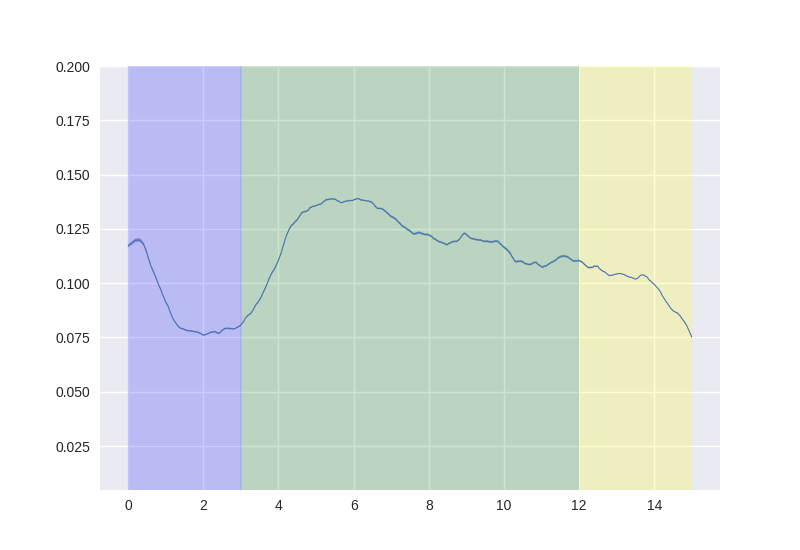

In [143]:
i = 0
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, [ymin, ymax])

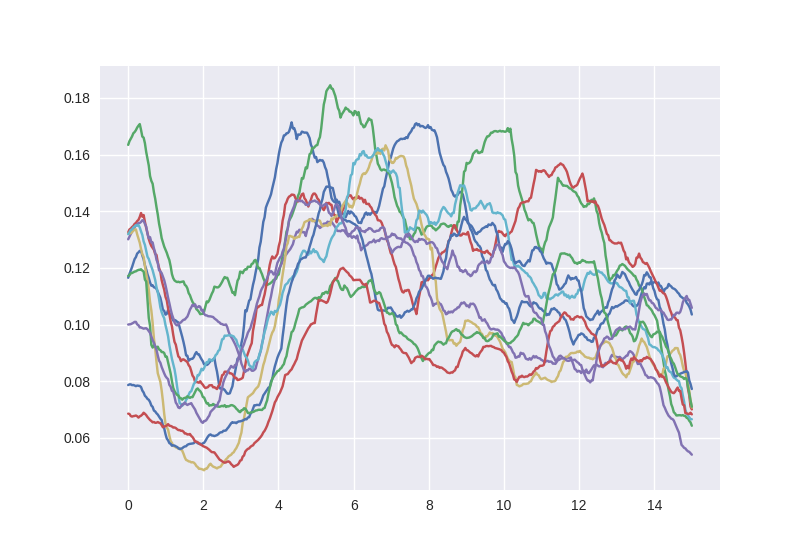

In [12]:
i = 0
plt.close('all')
figure, axis= plt.subplots()
rms_stack = eu.calculate_rms_average_trial(trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length)

loading_time = 9 # 6 
unloading_time = 3
resting_time = 3 # 5

time = np.linspace(0, loading_time+unloading_time+resting_time, rms_stack.shape[1])

for j in range(rms_stack.shape[0]):
    axis.plot(time, rms_stack[j])

# Calculate Averages

### Average Summary

In [96]:
trial_rest_avg, trial_load_avg, trial_unload_avg, trial_rest_var, trial_load_var, trial_unload_var = eu.calculate_average_all(trial_type_dflist, trial_emg_dflist, mvc_max)
baseline_rest_avg, baseline_load_avg, baseline_unload_avg, baseline_rest_var, baseline_load_var, baseline_unload_var = eu.calculate_average_all(baseline_type_dflist, baseline_emg_dflist, mvc_max)

trial_ratio_list = eu.load_rest_ratio(trial_load_avg, trial_rest_avg)
baseline_ratio_list = eu.load_rest_ratio(baseline_load_avg, baseline_rest_avg)

trial_diff_list = eu.load_rest_diff(trial_load_avg, trial_rest_avg)
baseline_diff_list = eu.load_rest_diff(baseline_load_avg, baseline_rest_avg)

In [99]:
for i in range(len(trial_rest_avg)):
    print("Trial " + str(i+1) + ":         rest: " + "{:.5f}".format(trial_rest_avg[i]) + " +/- " + "{:.5f}".format(trial_rest_var[i]) + ", load: " + "{:.5f}".format(trial_load_avg[i]) + "+/- " + "{:.5f}".format(trial_load_var[i]))

for i in range(len(baseline_rest_avg)):
    print("Baseline " + str(i+1) + ": rest: " + "{:.5f}".format(baseline_rest_avg[i]) + " +/- " + "{:.5f}".format(baseline_rest_var[i]) + ", load: " + "{:.5f}".format(baseline_load_avg[i]) + "+/- " + "{:.5f}".format(baseline_load_var[i]))

# "{:.2f}".format(self.objects.get(box.Class))

Trial 1:         rest: 0.01117 +/- 0.00005, load: 0.01100+/- 0.00001
Trial 2:         rest: 0.00915 +/- 0.00001, load: 0.01075+/- 0.00002
Trial 3:         rest: 0.00807 +/- 0.00001, load: 0.00874+/- 0.00001
Baseline 1: rest: 0.01320 +/- 0.00001, load: 0.01640+/- 0.00002
Baseline 2: rest: 0.01193 +/- 0.00001, load: 0.01545+/- 0.00002
Baseline 3: rest: 0.01072 +/- 0.00001, load: 0.01254+/- 0.00001


In [100]:
for i in range(len(trial_diff_list)):
    print("Trial " + str(i+1) + ":         load to rest difference: " + "{:.4f}".format(trial_diff_list[i]) + " +/- " + "{:.4f}".format(trial_load_var[i]+trial_rest_var[i]))

for i in range(len(baseline_diff_list)):
    print("Baseline " + str(i+1) + ": load to rest difference: " + "{:.4f}".format(baseline_diff_list[i]) + " +/- " + "{:.4f}".format(baseline_load_var[i]+baseline_rest_var[i]))

Trial 1:         load to rest difference: -0.0002 +/- 0.0001
Trial 2:         load to rest difference: 0.0016 +/- 0.0000
Trial 3:         load to rest difference: 0.0007 +/- 0.0000
Baseline 1: load to rest difference: 0.0032 +/- 0.0000
Baseline 2: load to rest difference: 0.0035 +/- 0.0000
Baseline 3: load to rest difference: 0.0018 +/- 0.0000


### Average RMS Summary

In [101]:
trial_rest_rms_avg, trial_load_rms_avg, trial_unload_rms_avg, trial_rest_rms_var, trial_load_rms_var, trial_unload_rms_var = eu.calculate_average_rms_all(trial_type_dflist, trial_emg_dflist, mvc_max, window_length)
baseline_rest_rms_avg, baseline_load_rms_avg, baseline_unload_rms_avg, baseline_rest_rms_var, baseline_load_rms_var, baseline_unload_rms_var = eu.calculate_average_rms_all(baseline_type_dflist, baseline_emg_dflist, mvc_max, window_length)

trial_rms_diff_list = eu.load_rest_diff(trial_load_rms_avg, trial_rest_rms_avg)
baseline_rms_diff_list = eu.load_rest_diff(baseline_load_rms_avg, baseline_rest_rms_avg)

for i in range(len(trial_rest_rms_avg)):
    print("Trial " + str(i+1) + ":         rest: " + "{:.5f}".format(trial_rest_rms_avg[i]) + " +/- " + "{:.5f}".format(trial_rest_rms_var[i]) + ", load: " + "{:.5f}".format(trial_load_rms_avg[i]) + " +/- " + "{:.5f}".format(trial_load_rms_var[i]))

for i in range(len(baseline_rest_rms_avg)):
    print("Baseline " + str(i+1) + ": rest: " + "{:.5f}".format(baseline_rest_rms_avg[i]) + " +/- " + "{:.5f}".format(baseline_rest_rms_var[i]) + ", load: " + "{:.5f}".format(baseline_load_rms_avg[i]) + " +/- " + "{:.5f}".format(baseline_load_rms_var[i]))

Trial 1:         rest: 0.01253 +/- 0.00004, load: 0.01149 +/- 0.00001
Trial 2:         rest: 0.00931 +/- 0.00000, load: 0.01128 +/- 0.00001
Trial 3:         rest: 0.00854 +/- 0.00001, load: 0.00905 +/- 0.00000
Baseline 1: rest: 0.01331 +/- 0.00001, load: 0.01690 +/- 0.00001
Baseline 2: rest: 0.01208 +/- 0.00000, load: 0.01615 +/- 0.00000
Baseline 3: rest: 0.01084 +/- 0.00000, load: 0.01303 +/- 0.00000


In [102]:
for i in range(len(trial_rms_diff_list)):
    print("Trial " + str(i+1) + ":         load to rest difference: " + "{:.5f}".format(trial_rms_diff_list[i]) + " +/- " + "{:.5f}".format(trial_load_rms_var[i]+trial_rest_rms_var[i]))

for i in range(len(baseline_rms_diff_list)):
    print("Baseline " + str(i+1) + ": load to rest difference: " + "{:.5f}".format(baseline_rms_diff_list[i]) + " +/- " + "{:.5f}".format(baseline_load_rms_var[i]+baseline_rest_rms_var[i]))

Trial 1:         load to rest difference: -0.00104 +/- 0.00004
Trial 2:         load to rest difference: 0.00197 +/- 0.00001
Trial 3:         load to rest difference: 0.00051 +/- 0.00001
Baseline 1: load to rest difference: 0.00358 +/- 0.00002
Baseline 2: load to rest difference: 0.00407 +/- 0.00001
Baseline 3: load to rest difference: 0.00218 +/- 0.00001


### Load EMG to Rest EMG Ratio

In [62]:
for i in range(len(trial_ratio_list)):
    print("Trial " + str(i+1) + ":         load to rest ratio: " + "{:.6f}".format(trial_ratio_list[i]))

for i in range(len(baseline_ratio_list)):
    print("Baseline " + str(i+1) + ": load to rest ratio: " + "{:.6f}".format(baseline_ratio_list[i]))

Trial 1:         load to rest ratio: 1.258030
Trial 2:         load to rest ratio: 1.271491
Trial 3:         load to rest ratio: 1.520228
Baseline 1: load to rest ratio: 1.409558
Baseline 2: load to rest ratio: 1.346284
Baseline 3: load to rest ratio: 1.414306
